In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import scipy
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})

sns.set_palette('husl')
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
train = pd.read_csv('../Thinkful-Unit-2/home-credit-default-risk/application_train.csv')
test=pd.read_csv('../Thinkful-Unit-2/home-credit-default-risk/application_test.csv')

In [4]:
train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [5]:
#change column titles to all lowercase
train.columns = [x.lower() for x in train.columns]
test.columns = [x.lower() for x in test.columns]
train.columns.values

array(['sk_id_curr', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'own_car_age',
       'flag_mobil', 'flag_emp_phone', 'flag_work_phone',
       'flag_cont_mobile', 'flag_phone', 'flag_email', 'occupation_type',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'weekday_appr_process_start',
       'hour_appr_process_start', 'reg_region_not_live_region',
       'reg_region_not_work_region', 'live_region_not_work_region',
       'reg_city_not_live_city', 'reg_city_not_work_city',
       'live_city_not_work_city', 'organization_type', 'ext_source_1',
       'ext_source_2', 'ext_source_3',

In [6]:
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)
train.head()

Training data shape:  (307511, 122)
Test data shape:  (48744, 121)


,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# from https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb# from  
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(test).head(10)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
commonarea_mode,33495,68.7
commonarea_medi,33495,68.7
commonarea_avg,33495,68.7
nonlivingapartments_medi,33347,68.4
nonlivingapartments_avg,33347,68.4
nonlivingapartments_mode,33347,68.4
fondkapremont_mode,32797,67.3
livingapartments_mode,32780,67.2
livingapartments_medi,32780,67.2
livingapartments_avg,32780,67.2


In [8]:
df = train.copy()

# taking a sample of training set for faster manipulations
#df = df.sample(frac=0.5)

target = df.target

In [9]:
# find correlations to target
corr_matrix = df.corr().abs()

print(corr_matrix['target'].sort_values(ascending=False).head(20))

target                         1.000000
ext_source_3                   0.178919
ext_source_2                   0.160472
ext_source_1                   0.155317
days_birth                     0.078239
region_rating_client_w_city    0.060893
region_rating_client           0.058899
days_last_phone_change         0.055218
days_id_publish                0.051457
reg_city_not_work_city         0.050994
flag_emp_phone                 0.045982
days_employed                  0.044932
reg_city_not_live_city         0.044395
flag_document_3                0.044346
floorsmax_avg                  0.044003
floorsmax_medi                 0.043768
floorsmax_mode                 0.043226
days_registration              0.041975
amt_goods_price                0.039645
own_car_age                    0.037612
Name: target, dtype: float64


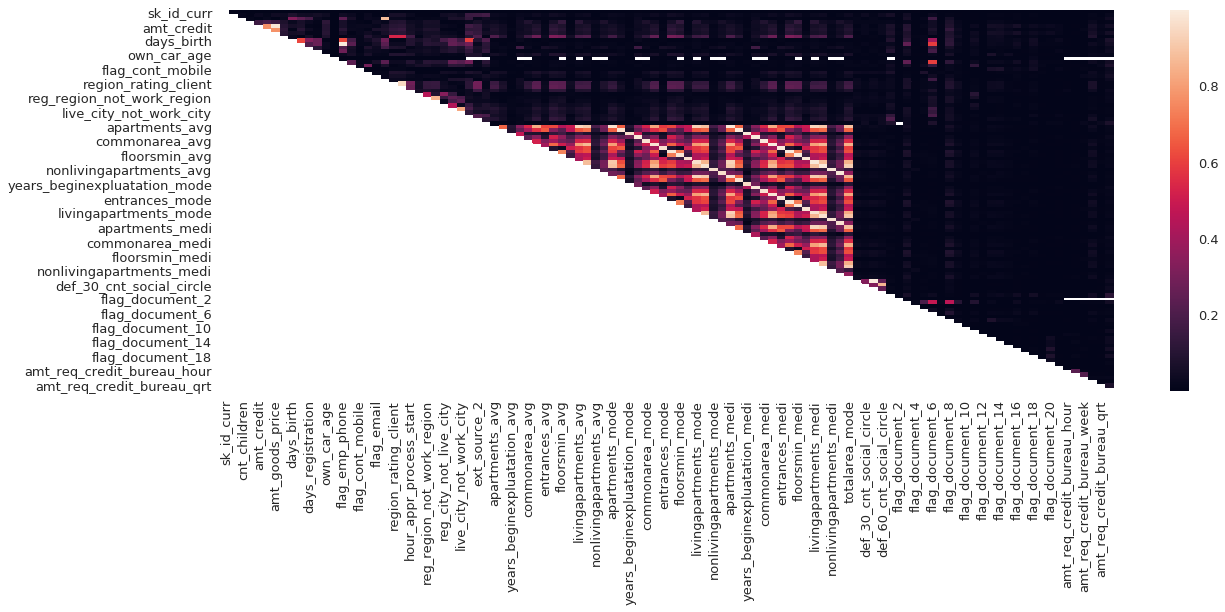

In [10]:
# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(upper)
plt.show;

In [11]:
# Match the columns in the dataframes
df, test = train.align(test, join = 'inner', axis = 1)

In [12]:
#dropping highly correlated features
#code from: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print('Columns to drop: ' , (len(to_drop)))

# Drop features 
df = df.drop(columns=to_drop)
print('train_features_df shape: ', df.shape)

Columns to drop:  35
train_features_df shape:  (307511, 86)


In [13]:
# checking missing values again

missing_values_table(df)

Your selected dataframe has 86 columns.
There are 34 columns that have missing values.


,Missing Values,% of Total Values
commonarea_avg,214865,69.9
nonlivingapartments_avg,213514,69.4
fondkapremont_mode,210295,68.4
floorsmin_avg,208642,67.8
years_build_avg,204488,66.5
own_car_age,202929,66.0
landarea_avg,182590,59.4
basementarea_avg,179943,58.5
ext_source_1,173378,56.4
nonlivingarea_avg,169682,55.2


In [14]:
def drop_missing_values(df, percent_drop):
    
    to_drop = [column for column in df if (df[column].isnull().sum()/len(df) >= percent_drop)]

    print('Columns to drop: ' , (len(to_drop)))
    # Drop features 
    df = df.drop(columns=to_drop)
    print('Shape: ', df.shape)
    return df

In [15]:
#dropping columns where >60% of values missing
df = drop_missing_values(df, .6)

Columns to drop:  6
Shape:  (307511, 80)


In [16]:
missing_values_table(df)

Your selected dataframe has 80 columns.
There are 28 columns that have missing values.


,Missing Values,% of Total Values
landarea_avg,182590,59.4
basementarea_avg,179943,58.5
ext_source_1,173378,56.4
nonlivingarea_avg,169682,55.2
elevators_avg,163891,53.3
wallsmaterial_mode,156341,50.8
apartments_avg,156061,50.7
entrances_avg,154828,50.3
housetype_mode,154297,50.2
floorsmax_avg,153020,49.8


In [17]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_type             2
code_gender                    3
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

In [18]:
df.code_gender.value_counts()

F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64

In [19]:
# getting rid of XNA values and label encode male/female
df['code_gender'] = df['code_gender'].replace(['M', 'F', 'XNA'], [1, 0, 1])
test['code_gender'] = test['code_gender'].replace(['M', 'F', 'XNA'], [1, 0, 1])

df['code_gender'].astype(int)
test['code_gender'].astype(int)

df.head()

,sk_id_curr,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,name_type_suite,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,Cash loans,1,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,0,N,N,0,270000.0,1293502.5,35698.5,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,1,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,0,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,1,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [21]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

In [22]:
print(df.emergencystate_mode.value_counts())
print(df.emergencystate_mode.isnull().sum())

No     159428
Yes      2328
Name: emergencystate_mode, dtype: int64
145755


In [23]:
# label encode emergencystate_mode column

df['emergencystate_mode'] = df['emergencystate_mode'].fillna(0)
test['emergencystate_mode'] = test['emergencystate_mode'].fillna(0)

df['emergencystate_mode'] = df['emergencystate_mode'].replace(['Yes', 'No'], [1, 0])
test['emergencystate_mode'] = test['emergencystate_mode'].replace(['Yes', 'No'], [1, 0])

In [24]:
print(df.emergencystate_mode.value_counts())

0    305183
1      2328
Name: emergencystate_mode, dtype: int64


In [25]:
#checking remaining categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
housetype_mode                 3
wallsmaterial_mode             7
dtype: int64

In [26]:
#dropping organization type => too many values to one hot encode
#dropping weekday_appr_process_start => assuming this isn't valuable 
df = df.drop(['organization_type', 'weekday_appr_process_start'], 1)

In [27]:
# one hot encoding remaining category columns

def one_hot_encoder(df):
    for col in df:
        if df[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(df[col].unique())) >= 3:
                hot = pd.get_dummies(df)
                
    return hot

In [28]:
df = one_hot_encoder(df)
test = one_hot_encoder(test)

In [29]:
## I have to run this twice for it to work how I expect??

# Align the training and testing data, keep only columns present in both dataframes
df, test = df.align(test, join = 'inner', axis = 1, broadcast_axis=1)

In [30]:
print(test.shape)
print(df.shape)
df.head()

(48744, 128)
(307511, 128)


,sk_id_curr,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,region_population_relative,...,housetype_mode_block of flats,housetype_mode_specific housing,housetype_mode_terraced house,wallsmaterial_mode_Block,wallsmaterial_mode_Mixed,wallsmaterial_mode_Monolithic,wallsmaterial_mode_Others,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",wallsmaterial_mode_Wooden
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,0.018801,...,1,0,0,0,0,0,0,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,0.003541,...,1,0,0,1,0,0,0,0,0,0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#making sure there are no more categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [32]:
columns = df.columns
index = df.index
test_index = test.index

In [33]:
print(test.shape)
print(df.shape)

(48744, 128)
(307511, 128)


In [34]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='mean')


df = pd.DataFrame(imputer.fit_transform(df))
test = pd.DataFrame(imputer.fit_transform(test))

df.columns = columns
df.index = index

test.columns = columns
test.index = test_index

df.head()

,sk_id_curr,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,region_population_relative,...,housetype_mode_block of flats,housetype_mode_specific housing,housetype_mode_terraced house,wallsmaterial_mode_Block,wallsmaterial_mode_Mixed,wallsmaterial_mode_Monolithic,wallsmaterial_mode_Others,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",wallsmaterial_mode_Wooden
0,100002.0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,0.018801,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,100003.0,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,0.003541,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,1.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling
### 1. Vanilla Logistic Regression

In [35]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [36]:
## whats with the random state 42?

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

In [37]:
# logistic regression probability

# normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(df)

##### standard scaler are you supposed to standardize the test to the training data?
x_test = scaler.fit_transform(test)

y = target

#fit the model
lr = linear_model.LogisticRegression().fit(X, y)

# predict - make sure to use predict_proba to get probability estimates - then keep only the 2nd column
y_ = lr.predict_proba(x_test)

In [38]:
#display
#print('Coefficients')
#print(lr.coef_)
print(lr.intercept_)

print('Percentage Accuracy')
print(lr.score(X, y))

[-2.77260484]
Percentage Accuracy
0.9191768749735781


In [39]:
submit = test[['sk_id_curr']].copy()
submit['target'] = y_[:,1]
submit.sk_id_curr = test.sk_id_curr.astype(int)
submit.to_csv('lr.csv', index=False)
submit.head()
# scored .732 on public leaderboard! best score yet!

,sk_id_curr,target
0,100001,0.054088
1,100005,0.217644
2,100013,0.023453
3,100028,0.045936
4,100038,0.125506


In [40]:
# Linear Regression Using l1 penalty (default is l2)
l1 = linear_model.LogisticRegression(penalty='l1', solver='saga').fit(X, y)

# predict - make sure to use predict_proba to get probability estimates - then keep only the 2nd column
y_ = l1.predict_proba(x_test)

/home/tara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [41]:
#display
#print('Coefficients')
#print(l1.coef_)
print(l1.intercept_)

print('Percentage Accuracy')
print(l1.score(X, y))

[-2.76714333]
Percentage Accuracy
0.9191508596440453


In [42]:
submit = test[['sk_id_curr']].copy()
submit['target'] = y_[:,1]
submit.sk_id_curr = test.sk_id_curr.astype(int)
submit.to_csv('l1.csv', index=False)
submit.head()
# scored .732 on public leaderboard! best score yet!

,sk_id_curr,target
0,100001,0.051893
1,100005,0.232487
2,100013,0.031508
3,100028,0.044551
4,100038,0.125773


In [43]:
#Normalizing the split up data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

lin_reg = linear_model.LogisticRegression().fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

In [44]:
#display
print('Coefficients')
print(lin_reg.coef_)
print(lin_reg.intercept_)

print('Percentage Accuracy')
print(lin_reg.score(X_test, y_test))

Coefficients
[[-5.46201339e-03 -1.33575018e-02  1.54587492e-01 -1.30701432e-01
   2.23351614e-02  3.17051146e-02 -1.97537909e-02 -3.98174332e-02
   9.98735040e-02  8.71865783e-03 -1.25899053e-02  5.55380912e+00
   3.44261614e-02  7.69804098e-02  8.00215926e-03  4.82386738e-02
  -7.24386777e-03 -3.68983889e-02 -1.09402850e-02 -7.37448682e-03
   6.47420463e-02 -6.13795945e-03 -1.60056775e-02 -1.49167681e-03
  -1.53888921e-02  5.97550838e-02 -4.10650288e-02  3.26894313e-02
  -1.64100710e-01 -3.88641552e-01 -4.76864217e-01  3.38908773e-02
  -1.49955664e-02 -1.73932701e-02  1.60078738e-03 -3.33844988e-02
  -5.02080039e-02  1.54106449e-02 -7.59723092e-03  9.39559931e-04
  -1.45266362e-02  5.57064763e-02  2.25352481e-02  5.92455439e-02
   1.59289441e-02  2.04672878e-01 -6.30506532e-02  4.31724829e-02
   1.15044020e-01  3.11805280e-03  7.52417322e-02  1.88578622e-02
  -2.46501040e-02 -4.74071847e-03 -9.20361726e-03 -3.85432889e-02
  -3.27064563e-02 -2.67357501e-02 -5.22579762e-02 -2.17587398e-

### 2. Ridge Regression

In [45]:
#fit the model
ridge = linear_model.Ridge().fit(X_train, y_train)

# predict
# ridge has no predict_proba method :( 
y_ = ridge.predict(X_test)

In [46]:
#display
#print('Coefficients')
#print(ridge.coef_)
print(ridge.intercept_)

print('Accuracy')
print(pd.crosstab(y_, y_test).head())

print('Percentage Accuracy')
print(ridge.score(X_test, y_test))

0.0807950293323159
Accuracy
target     0  1
row_0          
-0.436042  1  0
-0.180799  1  0
-0.160144  1  0
-0.138716  1  0
-0.128669  1  0
Percentage Accuracy
0.06132837759508835


In [47]:
# trying again - first using ridge cross validation to find best value for alpha

ridge_cv = linear_model.RidgeCV().fit(X_train, y_train)
ridge_alpha = ridge_cv.alpha_   
ridge_alpha 

10.0

In [48]:
# SGDRegressor penalty (regularization parameter) l2 = ridge
# eta0 = initial learning rate (default 0.25)
# warm_start = reuse solution to previous call to fit as initialization
# max_iter impacts fit method = max number of passes over training data
# l1_ratio = elastic net mixing parameter - defaults to 0.15 0 corresponds to l2 penalty

sgd_reg = linear_model.SGDRegressor(warm_start=True,
                       alpha=ridge_alpha,
                       penalty='l2',
                       l1_ratio=0,
                       learning_rate="constant",
                       eta0=0.0005,
                       max_iter=1)

sgd_reg.fit(X_train, y_train)
y_ = sgd_reg.predict(X_test)

In [49]:
#display
print('Coefficients')
print(sgd_reg.coef_)
print(sgd_reg.intercept_)

print('Accuracy')
print(pd.crosstab(y_, y_test).head())

print('Percentage Accuracy')
print(sgd_reg.score(X_test, y_test))

Coefficients
[ 2.08805141e-03 -1.88859543e-03  1.42309954e-03 -1.73585799e-03
  1.11016212e-03 -1.35127716e-04 -8.55283134e-04  4.80533721e-04
  9.62119293e-04  1.02671166e-04  2.76676141e-03 -1.55456790e-03
 -4.24215822e-04  2.02455949e-03  3.39811248e-06  1.51925905e-03
 -1.61459501e-04  8.28809630e-04  6.41286908e-04  3.65399558e-04
 -1.30124850e-03  6.04960858e-04  1.24989162e-03  3.07679654e-04
  4.03697425e-04  4.49971036e-03  3.42667235e-03  2.15750261e-03
 -5.90129139e-03 -4.01160326e-03 -4.57258151e-03 -1.27956395e-03
 -4.42791809e-04  5.88053573e-05 -7.57891339e-04 -1.85172412e-03
  3.97255749e-04 -1.28993363e-03 -1.55051740e-04  3.68699951e-03
  3.15722894e-03  1.34748548e-03  4.26063710e-04 -5.82536320e-04
 -8.99067650e-06  3.06620921e-03 -1.44175017e-05 -1.24995831e-03
 -1.11378326e-03 -2.22849429e-05 -8.63341953e-04 -3.68862484e-04
 -6.79626917e-06 -9.93735544e-04 -3.39811248e-06 -1.13088187e-04
 -5.87847000e-04 -5.55639993e-05 -7.55336862e-04 -2.58740817e-05
 -1.09721444

### 3. Lasso Regression

In [50]:
#fit the model
lasso = linear_model.Lasso().fit(X_train, y_train)

# predict
# ridge has no predict_proba method :( 
y_ = lasso.predict(X_test)

In [51]:
#display
print('Coefficients')
print(lasso.coef_)
print(lasso.intercept_)

y_ = lasso.predict(X_test)

print('Accuracy')
print(pd.crosstab(y_, y_test).head())

print('Percentage Accuracy')
print(lasso.score(X_test, y_test))

Coefficients
[-0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0. -0. -0.
 -0.  0.  0. -0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0. -0. -0.  0. -0. -0.
  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0.
 -0.  0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0. -0.
  0.  0. -0. -0. -0.  0.  0. -0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.
 -0.  0.]
0.08079502933231585
Accuracy
target        0     1
row_0                
0.080795  70687  6191
Percentage Accuracy
-9.472541109278865e-07


In [52]:
# trying again - first using cross validation to find best value for alpha

lasso_cv = linear_model.LassoCV().fit(X_train, y_train)
lasso_alpha = lasso_cv.alpha_   
lasso_alpha 

/home/tara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/tara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/tara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/tara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

4.331320223105292e-05

In [53]:
sgd_reg = linear_model.SGDRegressor(warm_start=True,
                       alpha=lasso_alpha,
                       penalty='l1',
                       l1_ratio=1,
                       learning_rate="constant",
                       eta0=0.0005,
                       max_iter=1)

sgd_reg.fit(X_train, y_train)
y_ = sgd_reg.predict(X_test)

In [54]:
#display
print('Coefficients')
print(sgd_reg.coef_)
print(sgd_reg.intercept_)

print('Accuracy')
print(pd.crosstab(y_, y_test).head())

print('Percentage Accuracy')
print(sgd_reg.score(X_test, y_test))

Coefficients
[-6.17997154e+07 -1.03651779e+08  3.01189156e+07  4.67881411e+07
 -8.22399461e+07  4.36737649e+07  3.07733298e+07 -1.42194328e+07
 -3.04867938e+07  7.87452212e+06  8.59441500e+07 -1.68191248e+08
 -4.62308379e+07  7.12902688e+06  1.13872301e+06  5.15166926e+07
 -1.03297042e+07 -8.21017376e+07  1.28303479e+07  3.48113200e+06
  1.11567611e+08  1.57248375e+06 -9.23999688e+06  1.46159083e+07
  1.26964042e+07  1.46354487e+07 -6.17133324e+06 -2.05621056e+07
  3.63639156e+07  8.04649820e+06  2.33643597e+07  3.15464893e+07
  1.18778994e+08  5.80513133e+06 -5.55535512e+07 -5.91454797e+07
  3.54605118e+07 -5.67174409e+07 -8.11373888e+07 -3.43547323e+06
  2.44525418e+07 -5.82853518e+06 -2.63726296e+05  7.50954604e+07
  1.70830843e+08  9.35968112e+07 -1.10522667e+10  4.66141489e+07
  1.28197017e+08  3.13097929e+07  4.29876464e+07  4.01557311e+07
  3.45112341e+06  1.14841793e+07  5.11401307e+05 -2.43272586e+06
 -8.84430411e+06  7.22977442e+06 -2.37334933e+07 -1.44354885e+06
 -4.99201661

## Summary

### Ridge Regression

Ridge regression is a regularized version of linear regression.  The Thinkful curriculum states that ridge regression shrinks parameter estimates, but the estimates never reach exactly 0. (If alpha reaches 0 then ridge regression is just linear regression.)

It's important to remember to scale the data first. (ex: StandardScaler)

As alpha increases we get less extreme and more reasonable predictions.  This reduces variance, but also increases bias.

Options for running ridge regression are closed form and gradient descent.

### Lasso Regression
(Least Absolute Shrinkage and Selection Operator)

Lasso Regression works to eliminate the weight of the least important features by setting them equal to 0.  It automatically performs feature selection and outputs a sparse matrix.

Lasso is a good choice if we suspect only a few features may be useful.

### Elastic Net

Elastic Net is the middle ground between ridge and lasso regression.  When r=0 we have ridge regression and when r=1 lasso.

Elastic Net is generally preferred to lasso as lasso can behave erratically if features are highly correlated or when the number of features is greater than the number of training instances.